In [6]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


You are using pip version 19.0.3, however version 19.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
import numpy as np

In [5]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install operator

Note: you may need to restart the kernel to use updated packages.


  Could not find a version that satisfies the requirement operator (from versions: )
No matching distribution found for operator


In [9]:
pip install re

Note: you may need to restart the kernel to use updated packages.


  Could not find a version that satisfies the requirement re (from versions: )
No matching distribution found for re


In [9]:
pip install sklearn

  Running setup.py install for sklearn: started
    Running setup.py install for sklearn: finished with status 'done'
Note: you may need to restart the kernel to use updated packages.


You are using pip version 19.0.3, however version 19.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import operator
import re
import seaborn as sns

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV

In [45]:
players_df = pd.read_csv("./datasets/data.csv")
players_df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [4]:
players_df = players_df.drop(columns=['ID','Photo','Club Logo','Work Rate','Body Type','Real Face','Loaned From',
                                     'LS','ST','RS','LW','LF','CF','RF','RW','LAM','CAM','RAM','LM','LCM','CM',
                                     'RCM','RM','LWB','LDM','CDM','RDM','RWB','LB','LCB','CB','RCB','RB'])
players_df = players_df.drop(players_df.columns[0], axis=1)
players_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 55 columns):
Name                        18207 non-null object
Age                         18207 non-null int64
Nationality                 18207 non-null object
Flag                        18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Value                       18207 non-null object
Wage                        18207 non-null object
Special                     18207 non-null int64
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null float64
Position                    18147 non-null object
Jersey Number               18147 non-null float64
Joined                      16654 non-null object
Contract Valid Until        17918 non-nul

In [5]:
players_df = players_df.dropna(axis = 0, how = 'any')
players_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16643 entries, 0 to 18206
Data columns (total 55 columns):
Name                        16643 non-null object
Age                         16643 non-null int64
Nationality                 16643 non-null object
Flag                        16643 non-null object
Overall                     16643 non-null int64
Potential                   16643 non-null int64
Club                        16643 non-null object
Value                       16643 non-null object
Wage                        16643 non-null object
Special                     16643 non-null int64
Preferred Foot              16643 non-null object
International Reputation    16643 non-null float64
Weak Foot                   16643 non-null float64
Skill Moves                 16643 non-null float64
Position                    16643 non-null object
Jersey Number               16643 non-null float64
Joined                      16643 non-null object
Contract Valid Until        16643 non-nul

In [6]:
def findValue(value):
    splitted = re.split('(\d+\.\d+|\d+)([A-Z])',value)
    try:
        if splitted[2] is 'M':
            return pd.to_numeric(splitted[1])
        else:
            return pd.to_numeric(splitted[1])/1000
    except IndexError:
        return 0

def findWages(value):
    return re.findall('\d+\.\d+|\d+',value)[0]

def findAttribute(value):
    return re.findall('\d+',value)
            
players_df['Value'] = players_df['Value'].apply(findValue)
players_df['Wage'] = players_df['Wage'].apply(findWages)
players_df['Value'] = pd.to_numeric(players_df['Value'])
players_df['Wage'] = pd.to_numeric(players_df['Wage'])
players_df

,Name,Age,Nationality,Flag,Overall,Potential,Club,Value,Wage,Special,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,L. Messi,31,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,110.50,565,2202,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,Cristiano Ronaldo,33,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,77.00,405,2228,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,Neymar Jr,26,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,118.50,290,2143,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,De Gea,27,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,72.00,260,1471,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,K. De Bruyne,27,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,102.00,355,2281,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
5,E. Hazard,27,Belgium,https://cdn.sofifa.org/flags/7.png,91,91,Chelsea,93.00,340,2142,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,€172.1M
6,L. Modrić,32,Croatia,https://cdn.sofifa.org/flags/10.png,91,91,Real Madrid,67.00,420,2280,...,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,€137.4M
7,L. Suárez,31,Uruguay,https://cdn.sofifa.org/flags/60.png,91,91,FC Barcelona,80.00,455,2346,...,85.0,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,€164M
8,Sergio Ramos,32,Spain,https://cdn.sofifa.org/flags/45.png,91,91,Real Madrid,51.00,380,2201,...,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,€104.6M
9,J. Oblak,25,Slovenia,https://cdn.sofifa.org/flags/44.png,90,93,Atlético Madrid,68.00,94,1331,...,70.0,27.0,12.0,18.0,86.0,92.0,78.0,88.0,89.0,€144.5M


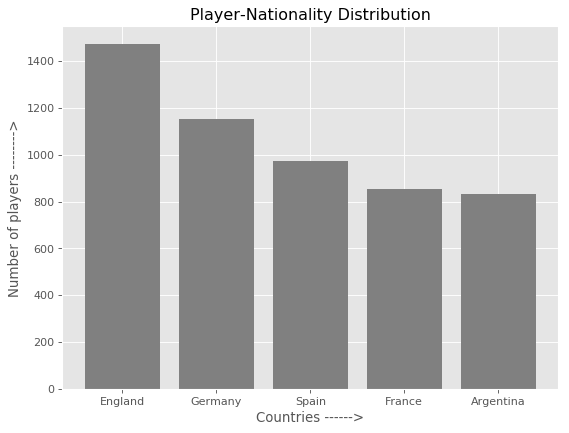

In [9]:
countries = list(players_df.groupby(['Nationality']).groups.keys())
temp = players_df.groupby(['Nationality']).count()
temp = list(temp.loc[:,"Name"])
countries_dict = dict(zip(countries,temp))
sorted_countries = sorted(countries_dict.items(), key=operator.itemgetter(1),reverse=True)
countries_dict = dict(sorted_countries)
countries_dict = {k: countries_dict[k] for k in list(countries_dict)[:5]}
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
with plt.style.context(('ggplot')):
    plt.bar(countries_dict.keys(), countries_dict.values(),color="grey")
    plt.xlabel('Countries ------>')
    plt.ylabel('Number of players -------->')
    plt.title('Player-Nationality Distribution')
    plt.show()

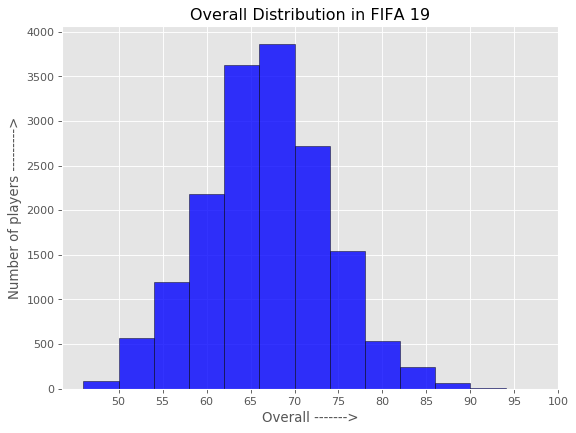

In [10]:
overall = list(players_df.loc[:,"Overall"])
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
with plt.style.context(('ggplot')):
    plt.hist(overall, bins=12, ec='black', alpha=0.8, color='blue')
    plt.xlabel("Overall ------->")
    plt.ylabel("Number of players --------->")
    plt.xticks([50,55,60,65,70,75,80,85,90,95,100])
    plt.title("Overall Distribution in FIFA 19")
    plt.show()

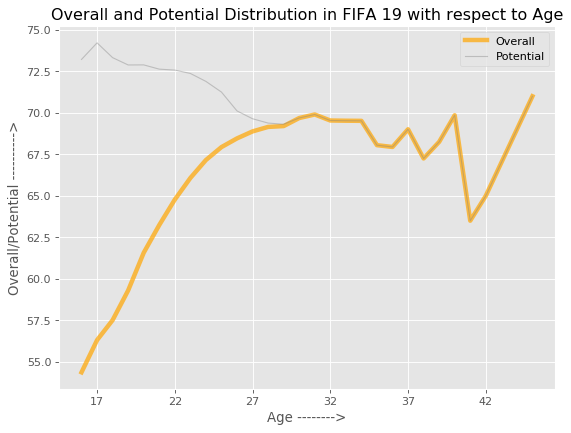

In [8]:
overall = players_df.groupby(['Age']).mean()
overall_list = list(overall.loc[:,"Overall"])
potential_list = list(overall.loc[:,"Potential"])
age = list(players_df.loc[:,"Age"].unique())
age = sorted(age)
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
with plt.style.context(('ggplot')):
    plt.xticks([17,22,27,32,37,42])
    plt.plot(age,overall_list,color='orange', linewidth=4, alpha=0.7, label='Overall')
    plt.plot(age,potential_list, color='grey', linewidth=1, alpha=0.4, label='Potential')
    plt.legend(loc='upper right')
    plt.xlabel("Age -------->")
    plt.ylabel("Overall/Potential ---------->")
    plt.title("Overall and Potential Distribution in FIFA 19 with respect to Age")
    plt.grid(b=None, which='major', axis='both', color='w')
    plt.show()

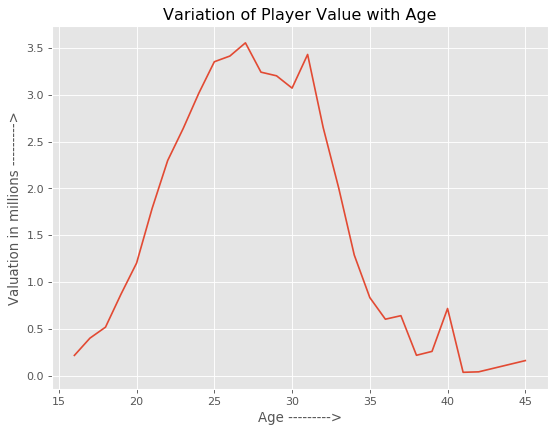

In [11]:
valuation = players_df.groupby(['Age']).mean()
valuation_list = list(valuation.loc[:,'Value'])
age = list(players_df.loc[:,'Age'].unique())
age = sorted(age)
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
with plt.style.context('ggplot'):
    plt.plot(age,valuation_list)
    plt.title("Variation of Player Value with Age")
    plt.xlabel("Age --------->")
    plt.ylabel("Valuation in millions --------->")
    plt.show()

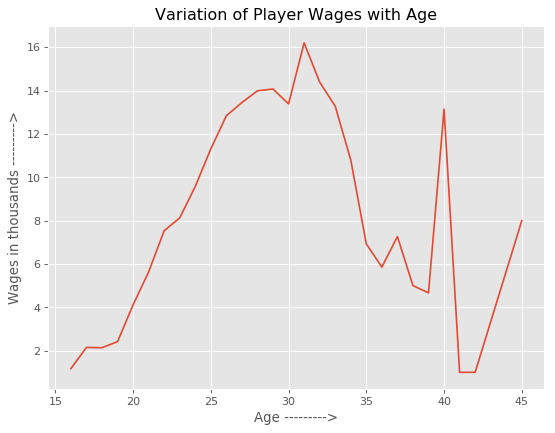

In [12]:
wages = players_df.groupby(['Age']).mean()
wages_list = list(valuation.loc[:,'Wage'])
age = list(players_df.loc[:,'Age'].unique())
age = sorted(age)
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
with plt.style.context('ggplot'):
    plt.plot(age,wages_list)
    plt.title("Variation of Player Wages with Age")
    plt.xlabel("Age --------->")
    plt.ylabel("Wages in thousands --------->")
    plt.show()

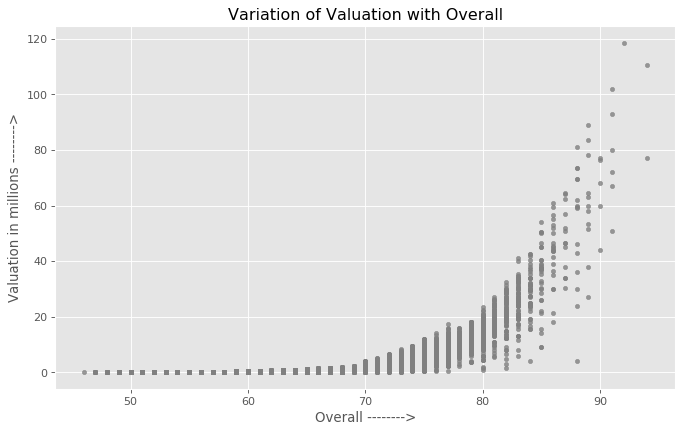

In [13]:
value_list = list(players_df.loc[:,'Value'])
overall = list(players_df.loc[:,'Overall'])
figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
with plt.style.context('ggplot'):
    plt.scatter(overall,value_list,s=15,alpha=0.8,c='grey')
    plt.xlabel('Overall -------->')
    plt.ylabel('Valuation in millions -------->')
    plt.title('Variation of Valuation with Overall')
    plt.show()

Text(0.5, 1.0, 'Range of Forward Overalls')

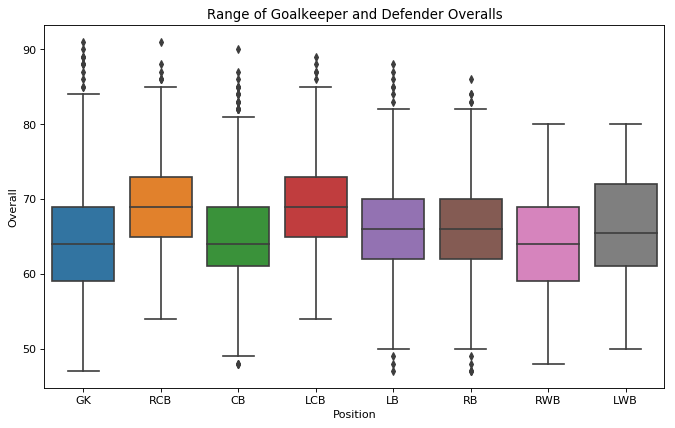

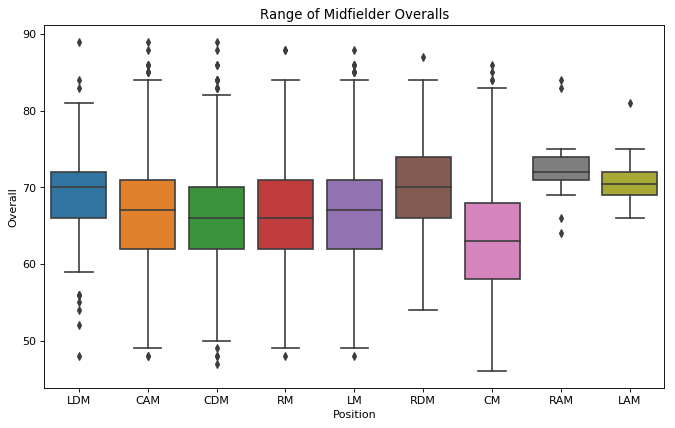

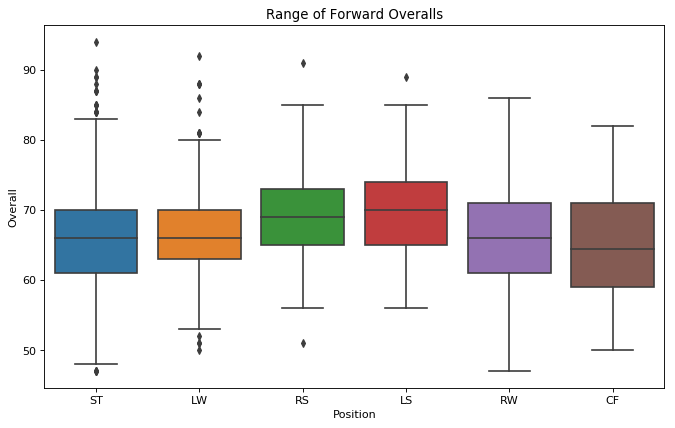

In [17]:
gk_defenders = players_df.loc[players_df['Position'].isin(['GK','RWB','RB','RCB','CB','LCB','LB','LWB'])]
figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
sns.boxplot(x= gk_defenders['Position'], y=gk_defenders['Overall']).set_title('Range of Goalkeeper and Defender Overalls')
midfielders = players_df.loc[players_df['Position'].isin(['RM','CM','LM','CDM','RDM','LDM','RAM','CAM','LAM'])]
figure(num=None, figsize=(10,6), dpi=80, facecolor='w', edgecolor='k')
sns.boxplot(x=midfielders['Position'],y=midfielders['Overall']).set_title('Range of Midfielder Overalls')
forwards = players_df.loc[players_df['Position'].isin(['RW','CF','LW','ST','RS','LS'])]
figure(num=None, figsize=(10,6), dpi=80, facecolor='w', edgecolor='k')
sns.boxplot(x=forwards['Position'], y=forwards['Overall']).set_title('Range of Forward Overalls')

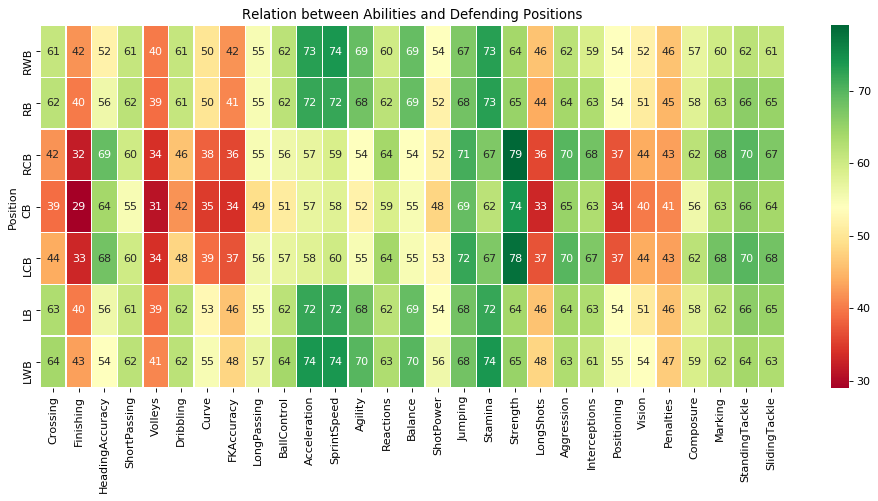

In [15]:
heatmap_df = players_df.filter(['Position','Crossing','Finishing','HeadingAccuracy','ShortPassing','Volleys','Dribbling',
                               'Curve','FKAccuracy','LongPassing','BallControl','Acceleration','SprintSpeed','Agility',
                                'Reactions','Balance','ShotPower','Jumping','Stamina','Strength','LongShots','Aggression',
                               'Interceptions','Positioning','Vision','Penalties','Composure','Marking','StandingTackle',
                               'SlidingTackle']).groupby('Position').mean()
heatmap_df_defenders = heatmap_df.loc[['RWB','RB','RCB','CB','LCB','LB','LWB']]
heatmap_df_defenders = heatmap_df_defenders.round().astype(int)
figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
sns.heatmap(heatmap_df_defenders,annot=heatmap_df_defenders,fmt="",cmap="RdYlGn",linewidths=0.3)
plt.title('Relation between Abilities and Defending Positions')
plt.show()

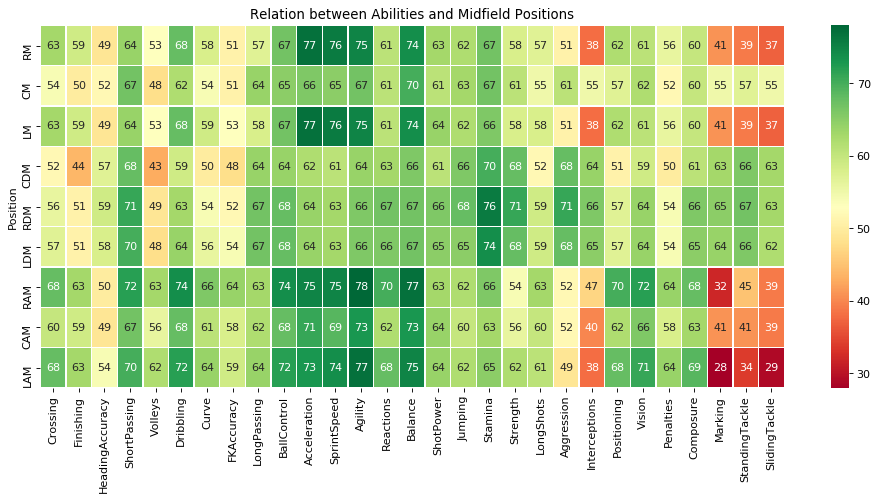

In [16]:
heatmap_df_midfielders = heatmap_df.loc[['RM','CM','LM','CDM','RDM','LDM','RAM','CAM','LAM']]
heatmap_df_midfielders = heatmap_df_midfielders.round().astype(int)
figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
sns.heatmap(heatmap_df_midfielders,annot=heatmap_df_midfielders,fmt="",cmap="RdYlGn",linewidths=0.3)
plt.title('Relation between Abilities and Midfield Positions')
plt.show()

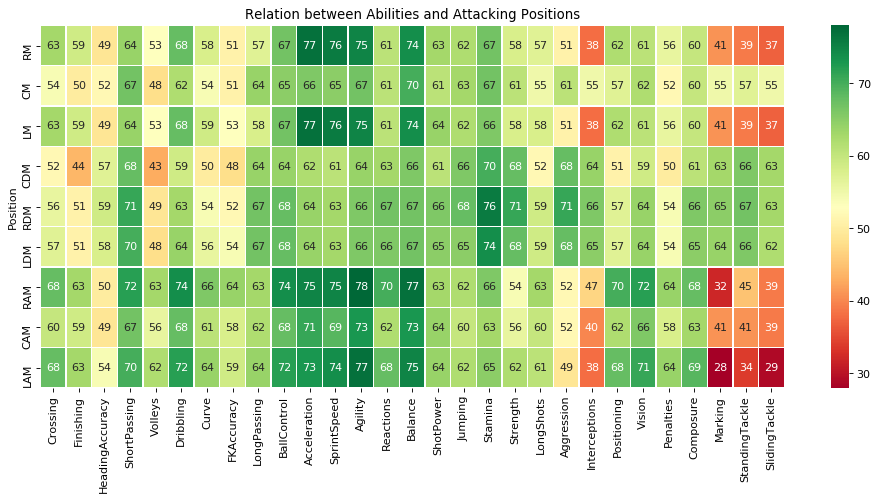

In [17]:
heatmap_df_attackers = heatmap_df.loc[['RW','CF','LW','ST','RS','LS']]
heatmap_df_attackers = heatmap_df_midfielders.round().astype(int)
figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
sns.heatmap(heatmap_df_attackers,annot=heatmap_df_attackers,fmt="",cmap="RdYlGn",linewidths=0.3)
plt.title('Relation between Abilities and Attacking Positions')
plt.show()

In [18]:
clubs_df = players_df.groupby('Club').mean()
clubs_df_youngest = clubs_df.sort_values(['Age'],ascending=True)
clubs_df_youngest = clubs_df_youngest['Age']
clubs_df_youngest = clubs_df_youngest[0:10]
clubs_df_eldest = clubs_df.sort_values(['Age'],ascending=False)
clubs_df_eldest = clubs_df_eldest['Age']
clubs_df_eldest = clubs_df_eldest[0:10]
clubs_youngest_eldest = pd.concat([clubs_df_youngest, clubs_df_eldest])

print(clubs_youngest_eldest)
#youngest_eldest_clubs = list(clubs_youngest_eldest.index.values)
#figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
#plt.barh(youngest_eldest_clubs, clubs_youngest_eldest)
#plt.show()

Club
FC Nordsjælland             20.259259
FC Sochaux-Montbéliard      21.400000
Bohemian FC                 21.480000
FC Groningen                21.500000
LOSC Lille                  21.750000
FC Admira Wacker Mödling    21.807692
Envigado FC                 22.035714
Barnsley                    22.076923
Górnik Zabrze               22.153846
Sligo Rovers                22.157895
Paraná                      31.600000
Cruzeiro                    30.600000
Atlético Paranaense         30.400000
Chapecoense                 30.400000
Botafogo                    30.400000
Sport Club do Recife        30.200000
Ceará Sporting Club         30.200000
Fluminense                  30.200000
Grêmio                      30.000000
Bahia                       30.000000
Name: Age, dtype: float64


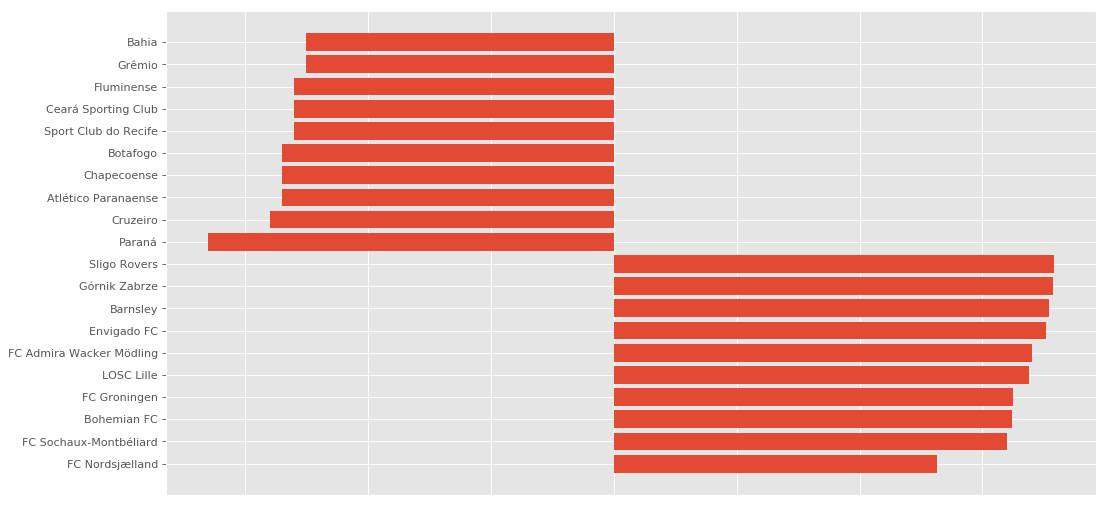

In [19]:
clubs_youngest_plot = list(clubs_df_youngest)
clubs_youngest_plot[:] = [age - 15 for age in clubs_youngest_plot]
clubs_eldest_plot = list(clubs_df_eldest)
clubs_eldest_plot[:] = [age - 25 for age in clubs_eldest_plot]
clubs_eldest_plot[:] = [-age for age in clubs_eldest_plot]
clubs_plot = clubs_youngest_plot + clubs_eldest_plot
youngest_eldest_clubs = list(clubs_youngest_eldest.index.values)
with plt.style.context('ggplot'):
    figure(num=None, figsize=(15, 8), dpi=80, edgecolor='k')
    plt.barh(youngest_eldest_clubs, clubs_plot)
    plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    clubs_youngest_eldest = list(clubs_youngest_eldest)
    plt.show()

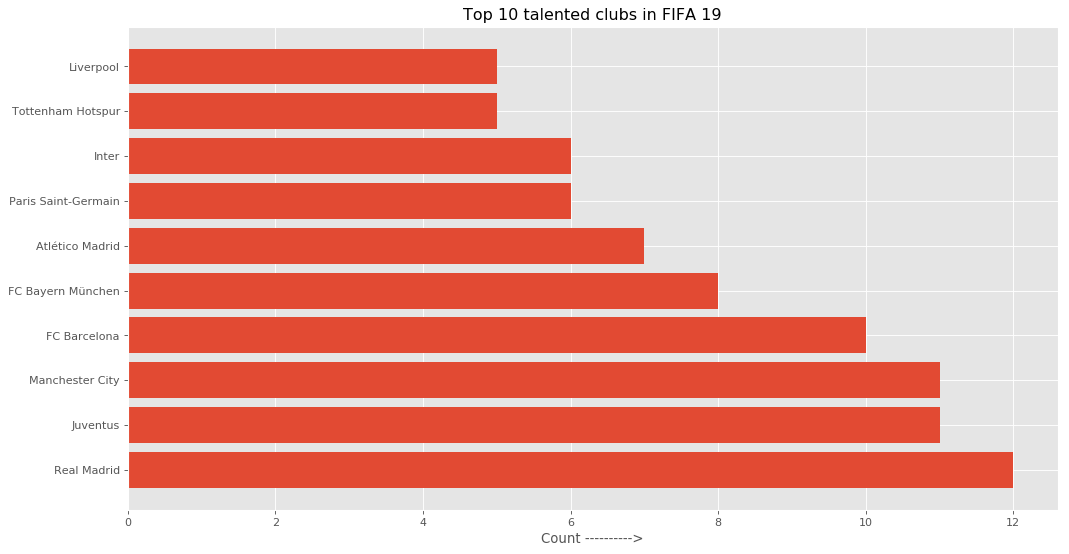

In [32]:
#Clubs with the most talents
talents_df = players_df.filter(["Name", "Club", "Overall"])
talents_df = talents_df[talents_df.Overall >= 85]
talents_df = talents_df.groupby("Club").count()
talents_df = talents_df.sort_values(by=['Name'],ascending=False)
talents_df = talents_df[:10]
talents_clubs = list(talents_df.index.values)
talents_count = list(talents_df.iloc[:, 1])
with plt.style.context('ggplot'):
    figure(num=None, figsize=(15, 8), dpi=80, edgecolor='k')
    plt.barh(talents_clubs, talents_count)
    plt.title('Top 10 talented clubs in FIFA 19')
    plt.xlabel('Count ---------->')
    plt.show()

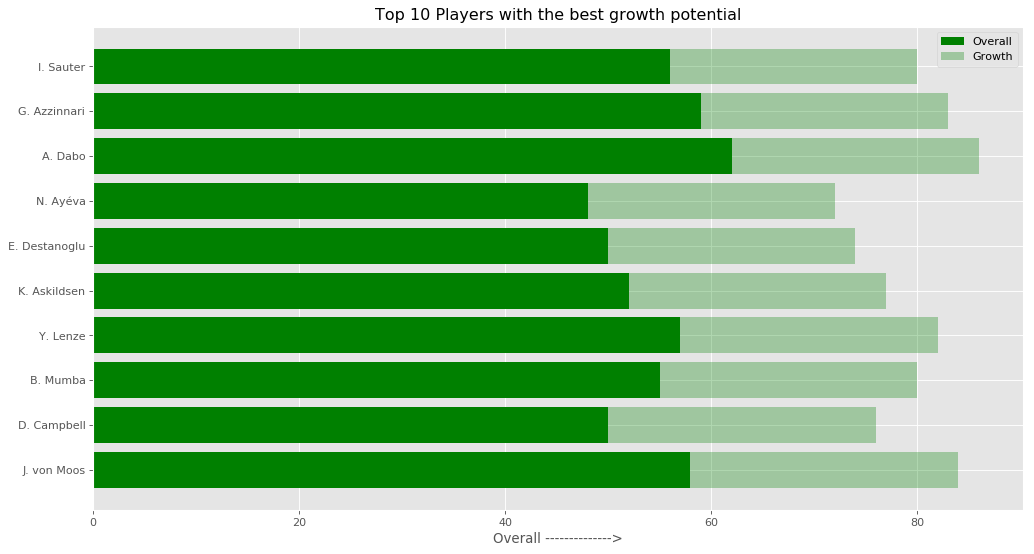

In [67]:
potential_df = players_df.filter(['Name','Age','Overall','Potential'])
potential_df['Growth'] = potential_df['Potential'] - potential_df['Overall']
potential_df = potential_df.sort_values(by=['Growth'],ascending=False)
potential_df = potential_df.iloc[:10]
players_list = list(potential_df.iloc[:, 0])
overall_list = list(potential_df.iloc[:,2])
growth_list = list(potential_df.iloc[:,4])
with plt.style.context('ggplot'):
    figure(num=None, figsize=(15, 8), dpi=80, edgecolor='k')
    plt.barh(players_list, overall_list, color='green', label='Overall')
    plt.barh(players_list, growth_list, left=overall_list, color='green', label='Growth', alpha=0.3)
    plt.legend()
    plt.title('Top 10 Players with the best growth potential')
    plt.xlabel('Overall -------------->')
    plt.show()

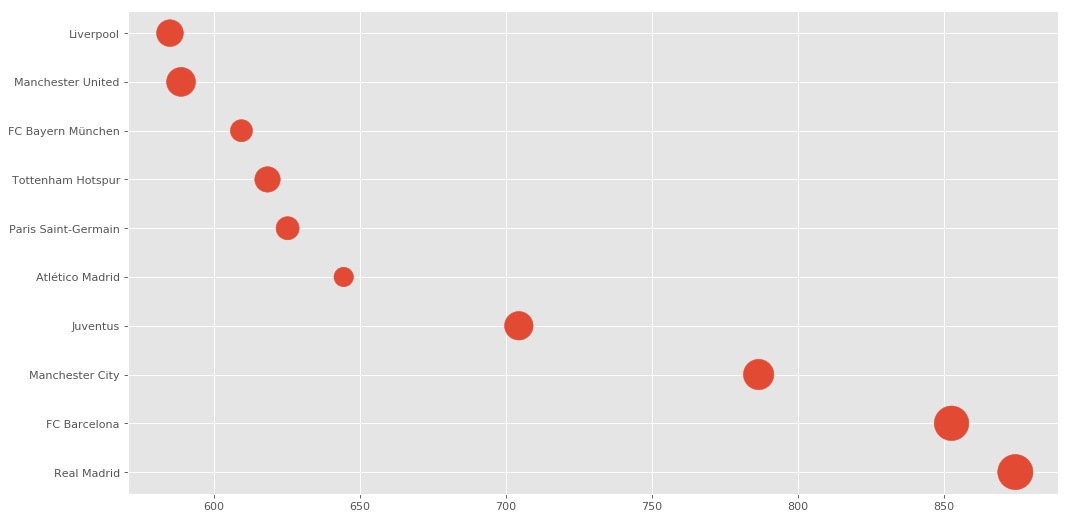

In [108]:
#Most squad valuation
valuation_df = players_df.filter(['Name','Club','Value','Wage'])
valuation_df = valuation_df.groupby('Club').sum()
valuation_df = valuation_df.sort_values(by=['Value'], ascending=False)
valuation_df = valuation_df[:10]
clubs_list = list(valuation_df.index.values)
value_list = list(valuation_df.iloc[:, 0])
wage_list = list(valuation_df.iloc[:, 1])
alpha_list = wage_list
wage_list[:] = [wages / 5 for wages in wage_list]
#alpha_list[:] = [alpha/1004 for alpha in alpha_list]
rgba_colors = np.zeros((10,4))
rgba_colors[:,0] = 1.0
rgba_colors[:, 3] = alpha_list
with plt.style.context('ggplot'):
    figure(num=None, figsize=(15, 8), dpi=80, edgecolor='k')
    plt.scatter(value_list, clubs_list, s = wage_list )
    plt.show()

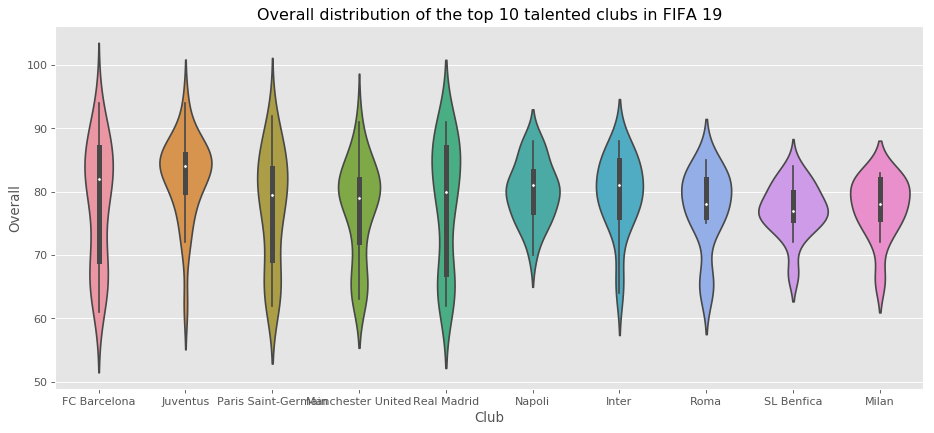

In [26]:
talented_df = players_df.filter(['Name', 'Club', 'Overall'])
talented_df = talented_df.groupby('Club').mean()
talented_df = talented_df.sort_values(by=['Overall'], ascending=False)
talented_df = talented_df[:10]
talented_clubs = talented_df.index.values
players_talented_clubs = players_df.filter(['Name','Club','Overall'])
players_talented_clubs = players_talented_clubs.loc[players_talented_clubs['Club'].isin(talented_clubs)]
players_talented_clubs
with plt.style.context('ggplot'):
    figure(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
    sns.violinplot(x= players_talented_clubs['Club'], y=players_talented_clubs['Overall']).set_title('Overall distribution of the top 10 talented clubs in FIFA 19')

In [103]:
x = np.arange(10)
y = np.arange(10)

alphas = np.linspace(0.1, 1, 10)
rgba_colors = np.zeros((10,4))
# for red the first column needs to be one
rgba_colors[:,0] = 1.0
# the fourth column needs to be your alphas
rgba_colors[:, 3] = alpha_list
rgba_colors
#plt.scatter(x, y, color=rgba_colors)
#plt.show()

array([[1.        , 0.        , 0.        , 0.99940239],
       [1.        , 0.        , 0.        , 0.96354582],
       [1.        , 0.        , 0.        , 0.74521912],
       [1.        , 0.        , 0.        , 0.65577689],
       [1.        , 0.        , 0.        , 0.30537849],
       [1.        , 0.        , 0.        , 0.43047809],
       [1.        , 0.        , 0.        , 0.52250996],
       [1.        , 0.        , 0.        , 0.39262948],
       [1.        , 0.        , 0.        , 0.67549801],
       [1.        , 0.        , 0.        , 0.57808765]])

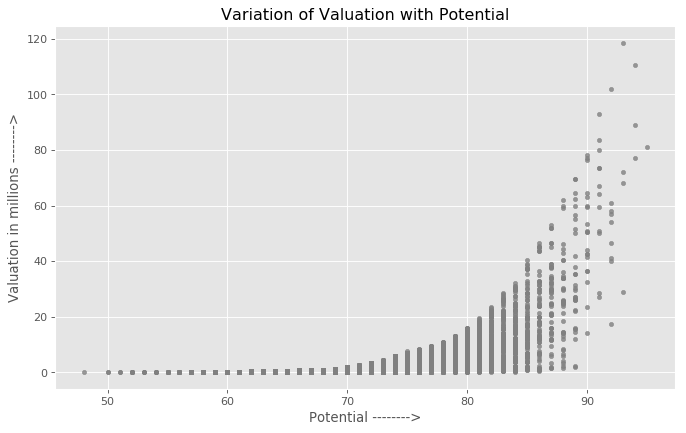

In [28]:
pot = list(players_df.iloc[:,5])
val = list(players_df.iloc[:,7])
figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
with plt.style.context('ggplot'):
    plt.scatter(pot,val,s=15,alpha=0.8,c='grey')
    plt.xlabel('Potential -------->')
    plt.ylabel('Valuation in millions -------->')
    plt.title('Variation of Valuation with Potential')
    plt.show()

In [28]:
X = players_df.iloc[:,4:6]
y = players_df.iloc[:,7]
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.20, random_state = 42)
test_X

,Overall,Potential
1549,76,76
4654,71,84
6352,69,75
6215,69,69
12366,63,73
4787,70,70
4766,70,72
9447,66,66
12099,63,68
4938,70,73


In [29]:
print('Training matrix of features shape: ', train_X.shape)
print('Training dependent variable shape: ', train_y.shape)
print('Test matrix of features shape: ', test_X.shape)
print('Test dependent variable shape: ', test_y.shape)

Training matrix of features shape:  (13314, 2)
Training dependent variable shape:  (13314,)
Test matrix of features shape:  (3329, 2)
Test dependent variable shape:  (3329,)


In [40]:
regressor = RandomForestRegressor(n_estimators=10, random_state=42)
regressor.fit(train_X, train_y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [41]:
predictions = regressor.predict(test_X)
errors = abs(predictions - test_y)
print('Mean absolute error: ',round(np.mean(errors),2) )

Mean absolute error:  0.45


In [42]:
#Mean absolute Percentage error
mape = 100 * (errors/test_y)

#Calculating accuracy
acc = 100 - np.mean(mape)
print('Accuracy: ', round(acc,2), ' %')

Accuracy:  74.94  %


In [33]:
print(regressor.get_params())

{'bootstrap': True, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 1000, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [35]:
n_estimators = [int(x) for x in np.linspace(start=200, stop= 2000, num=10)]
max_features = ['auto','sqrt']
max_depth = [int(x) for x in np.linspace(10,110,num=11)]
max_depth.append(None)
min_samples_split = [2,5,10]
min_samples_leaf = [1,2,4]
bootstrap = [True,False]
random_grid = {'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,
              'bootstrap': bootstrap}
regressor_random = RandomizedSearchCV(estimator = regressor, param_distributions = random_grid, 
                                     n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)
regressor_random.fit(train_X, train_y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  9.4min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 17.4min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [36]:
regressor_random.best_params_

{'n_estimators': 600,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 40,
 'bootstrap': True}

In [38]:
predictions_random = regressor_random.predict(test_X)
errors = abs(predictions_random - test_y)
print('Mean absolute error: ',round(np.mean(errors),2) )

Mean absolute error:  0.45


In [39]:
#Mean absolute Percentage error
mape = 100 * (errors/test_y)

#Calculating accuracy
acc = 100 - np.mean(mape)
print('Accuracy: ', round(acc,2), ' %')

Accuracy:  75.01  %
